In [1]:
import numpy as np
import cv2
import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
image=cv2.imread('aa.png')
image2=cv2.imread('ee.png')
cv2.imshow("Anh truy van",image)
cv2.imshow('Anh dao tao',image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
image1=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [8]:
orb=cv2.ORB_create()
kp1,descriptor1=orb.detectAndCompute(image1,None)
kp2,descriptor2=orb.detectAndCompute(image2,None)
print('Keypoint cua anh 1: ',len(kp1))
print('Keypoint cua anh 2: ',len(kp2))

Keypoint cua anh 1:  460
Keypoint cua anh 2:  494


So diem tuong thich:  115


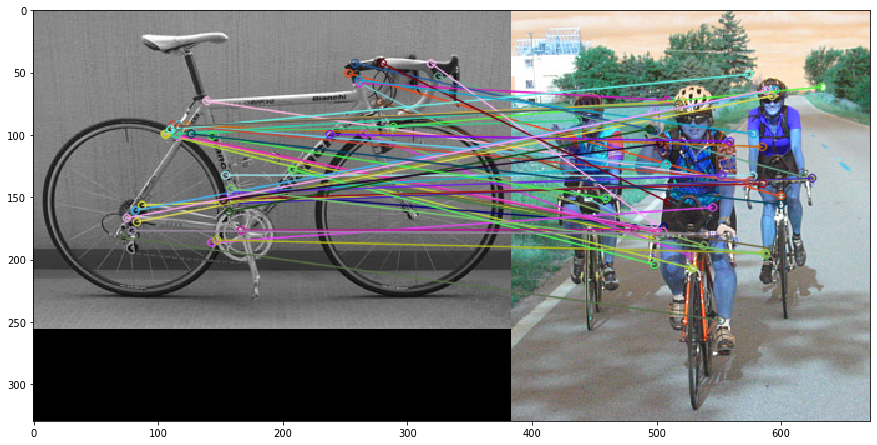

In [17]:
Matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=Matcher.match(descriptor1,descriptor2)
matches=sorted(matches,key=lambda x:x.distance)
print("So diem tuong thich: ", len(matches))
#for m in matches:
#    print(m.distance)
image3=cv2.drawMatches(image1,kp1,image2,kp2,matches[:50],None,flags=2)
fig=plt.figure(figsize=(15,15))
plt.imshow(image3)
plt.show()
cv2.imshow('Anh ket qua',image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
results={}
Matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
for des_path in glob.glob('Descriptors/*'):
    sum=0
    ImageID=des_path[des_path.rfind("\\")+1:].split('.')[0]
    desriptor=np.load(des_path)
    matches=Matcher.match(descriptor1,desriptor)
    matches=sorted(matches,key=lambda x:x.distance)
    for i in range(50):
        sum+=matches[i].distance
    sum=sum/50
    results[ImageID]=sum
results=sorted([(v,k) for (k,v) in results.items()])

In [7]:
for (v,k) in results:
    print('ID :',k)
    print('V :',v)

ID : homepage2niftycomhosonumabicyclepantanitdfIMG12741
V : 1.42
ID : wwwrivendellbicyclescomimagesbikesmainatlantis2
V : 52.78
ID : yfieldcomveralucbicycle2desert
V : 56.46
ID : wwwdowntheroadorgimagesPhoto20AlbumNewFolder11DSC00089
V : 56.92
ID : wwwunclepashacommoscowaccommodationdutchloftbicyclesmm
V : 56.94
ID : visualizationtudelftnlariweblogfietsactie1
V : 57.86
ID : homewangjianshuocomphotochongmingslidesshanghaibicyclestartingvanke
V : 58.02
ID : wwwbalanceforlifecomimagescontenthealthtipsbicyclemain
V : 58.04
ID : wwwbikeiconscomimages189720Columbus20Bicycle20Co20Girls
V : 58.12
ID : wwwworldshop1comchinedirectimagesbicyclesPL26E88E20Electric20Bicycle
V : 58.18
ID : wwwtotalbikecomgalleryimages18
V : 58.46
ID : wwwmomovelocomimagescheesecheese3760
V : 58.62
ID : wwwlpdssztakihurobertophotosGreece98bicycle
V : 58.68
ID : wwwbrucedalecomChina20PhotosNorthwest20Chinabicycle
V : 58.74
ID : wwwmunsonbuilderscomSouthportPhotosman20on20bicycle20by20fingelly20real20estate
V : 58.82
I

In [8]:
type(results)

list

In [15]:
r1=cv2.imread('bicycle/'+results[0][1]+'.png')
r2=cv2.imread('bicycle/'+results[1][1]+'.png')
r3=cv2.imread('bicycle/'+results[2][1]+'.png')
r4=cv2.imread('bicycle/'+results[3][1]+'.png')
cv2.imshow('Query Image',image)
cv2.imshow('R1',r1)
cv2.imshow('R2',r2)
cv2.imshow('R3',r3)
cv2.imshow('R4',r4)
cv2.waitKey(0)
cv2.destroyAllWindows()